In [1]:
import random
import datetime
import matplotlib.pyplot as plt
import pandas as pd


In [50]:
city = []
#eg=
for line in open("tsp.txt"):
    place,lon,lat = line.strip().split(" ")
    city.extend([(place,(lon,lat))])  #导入城市的坐标

city1=city.copy()
city_list=[]
cc=city1.copy()
city_list.append(cc)
i=0
while i < 28:
    city1.append(city1[0])
    city1.remove(city1[0])
    cc=city1.copy()
    city_list.append(cc)
    i=i+1

In [51]:
#输入
ex1=city_list[0]
ex1[0][1]

('1150.0', '1760.0')

In [162]:
def tabusearch(stop_time,initial_route,candidate_t,tabu_length):
    def calcu_cost(route):
        distance=0
        for i in range(0,28):
            distance+=np.linalg.norm(np.array([float(route[i][1][0]),float(route[i][1][1])])-np.array([float(route[i+1][1][0]),float(route[i+1][1][1])]))
        distance+=np.linalg.norm(np.array([float(route[0][1][0]),float(route[0][1][1])])-np.array([float(route[28][1][0]),float(route[28][1][1])]))
        return distance
    def move(route,t):
        min_distance=100000
        best_route=0
        best_change=0
        routes=[]
        changes=[]
        distances=[]
        for i in range(t):
            route_new=route.copy()
            change=random.sample(route_new[1:],2)
            change.sort()
            route_new[route_new.index(change[1])]=change[0]
            route_new[route_new.index(change[0])]=change[1]
            routes.append(route_new)
            changes.append(change)
            distances.append(calcu_cost(route_new))
        return(routes,changes,distances)
    def add_or_not(move_tabu,distance_tabu,new_move,new_distance):
        if new_move not in move_tabu:
            return(True)
        elif new_distance < distance_tabu[move_tabe.index(new_move)]:
            return(True)
        else:
            return(False)    
    def add_tabulist(move_tabu,distance_tabu,new_move,new_distance,tabu_length):
        move_tabu.append(new_move)
        distance_tabu.append(new_distance)
        if len(move_tabu)>tabu_length:
            del move_tabu[0]
            del distance_tabu[0]
        return(move_tabu,distance_tabu)
    all_routes=[]
    all_distances=[]
    move_tabe=[]
    distance_tabu=[]
    route=initial_route.copy()
    for i in range(stop_time):
        routes,changes,distances=move(route,candidate_t)
        a=0
        while a==0:
            if add_or_not(move_tabe,distance_tabu,changes[distances.index(min(distances))],min(distances)):
                move_tabe,distance_tabu= add_tabulist(move_tabe,distance_tabu,changes[distances.index(min(distances))],min(distances),tabu_length)
                all_routes.append(routes[distances.index(min(distances))])
                all_distances.append(min(distances))
                a=1
                route=routes[distances.index(min(distances))]
            else:
                routes.remove(routes[distances.index(min(distances))])
                changes.remove(changes[distances.index(min(distances))])
                distances.remove(min(distances))
                if len(routes)==0:
                    a=1        
    return(min(all_distances),all_routes[all_distances.index(min(all_distances))])

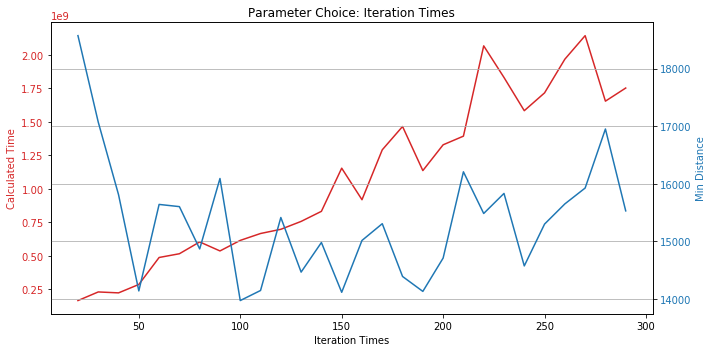

In [233]:
time_interation_time=[]
distances=[]
for i in range(20,300,10):
    s1=datetime.datetime.now()
    distance=tabusearch(i,ex1,20,10)[0]
    s2=datetime.datetime.now()
    time_interation_time.append(s2-s1)
    distances.append(distance)

df=pd.DataFrame()
index_a=[i for i in range(20,300,10)]
df['time']=time_interation_time
df['min_distances']=distances
df.index=index_a


fig, ax1 = plt.subplots(figsize=(10,5))

color = 'tab:red'
ax1.set_xlabel('Iteration Times')
ax1.set_ylabel('Calculated Time', color=color)
ax1.plot(index_a, df['time'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Min Distance', color=color)  # we already handled the x-label with ax1
ax2.plot(index_a, df['min_distances'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Parameter Choice: Iteration Times')
plt.grid(axis='y')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

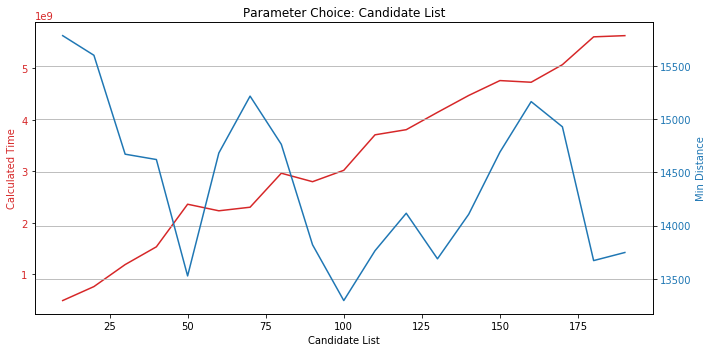

In [234]:
#(27+1)*(13)+14
candidate_t_time=[]
distance_2=[]
for i in range(10,200,10):
    s1=datetime.datetime.now()
    distance=tabusearch(100,ex1,i,10)[0]
    s2=datetime.datetime.now()
    candidate_t_time.append(s2-s1)
    distance_2.append(distance)
    
df2=pd.DataFrame()
index_b=[i for i in range(10,200,10)]
df2['time']=candidate_t_time
df2['min_distances']=distance_2
df2.index=index_b


import matplotlib.pyplot as plt
fig, ax1 = plt.subplots(figsize=(10,5))

color = 'tab:red'
ax1.set_xlabel('Candidate List')
ax1.set_ylabel('Calculated Time', color=color)
ax1.plot(index_b, df2['time'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Min Distance', color=color)  # we already handled the x-label with ax1
ax2.plot(index_b, df2['min_distances'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Parameter Choice: Candidate List')
plt.grid(axis='y')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

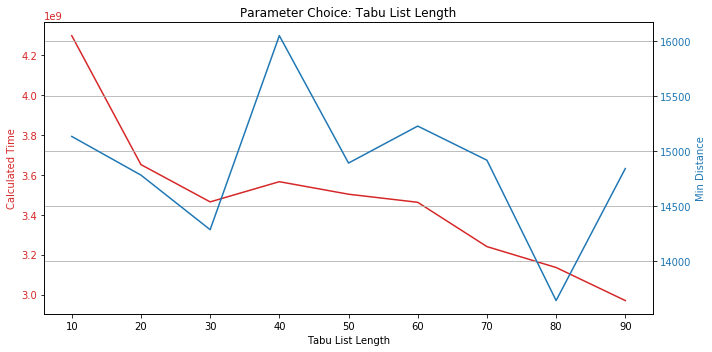

In [235]:
tabu_length=[]
distance_3=[]
for i in range(10,100,10):
    s1=datetime.datetime.now()
    distance=tabusearch(100,ex1,100,i)[0]
    s2=datetime.datetime.now()
    tabu_length.append(s2-s1)
    distance_3.append(distance)
    
df3=pd.DataFrame()
index_c=[i for i in range(10,100,10)]
df3['tabu_length']=tabu_length
df3['min_distances']=distance_3
df3.index=index_c


fig, ax1 = plt.subplots(figsize=(10,5))

color = 'tab:red'
ax1.set_xlabel('Tabu List Length')
ax1.set_ylabel('Calculated Time', color=color)
ax1.plot(index_c, df3['tabu_length'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Min Distance', color=color)  # we already handled the x-label with ax1
ax2.plot(index_c, df3['min_distances'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Parameter Choice: Tabu List Length')
plt.grid(axis='y')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [236]:
tabusearch(100,ex1,100,30)

(14481.907340231939,
 [('1', ('1150.0', '1760.0')),
  ('28', ('1260.0', '1910.0')),
  ('6', ('1030.0', '2070.0')),
  ('9', ('790.0', '2260.0')),
  ('5', ('750.0', '2030.0')),
  ('3', ('40.0', '2090.0')),
  ('8', ('1490.0', '1630.0')),
  ('7', ('1650.0', '650.0')),
  ('4', ('750.0', '1100.0')),
  ('13', ('970.0', '1340.0')),
  ('16', ('1280.0', '1200.0')),
  ('25', ('1280.0', '790.0')),
  ('19', ('1040.0', '950.0')),
  ('17', ('230.0', '590.0')),
  ('22', ('490.0', '500.0')),
  ('11', ('840.0', '550.0')),
  ('14', ('510.0', '700.0')),
  ('18', ('460.0', '860.0')),
  ('15', ('750.0', '900.0')),
  ('20', ('590.0', '1390.0')),
  ('21', ('830.0', '1770.0')),
  ('27', ('1460.0', '1420.0')),
  ('23', ('1840.0', '1240.0')),
  ('24', ('1260.0', '1500.0')),
  ('10', ('710.0', '1310.0')),
  ('2', ('630.0', '1660.0')),
  ('29', ('360.0', '1980.0')),
  ('26', ('490.0', '2130.0')),
  ('12', ('1170.0', '2300.0'))])